In [126]:
import pandas as pd 
import numpy as np
import seaborn as sb

In [127]:
data = pd.read_csv('Meteorite_Landings.csv', sep=',')
data = data.dropna()
data = data.head(60)
data = data['mass (g)']
data = data.astype(int).astype(str).str[:2].astype(int)

In [128]:

mean = np.mean(data)
median = np.nanmedian(data)
max = np.max(data)
min = np.min(data)
amplitude = max - min
num_class = int(1 + np.log2(len(data)))
class_width = amplitude / num_class
ranges = np.arange(min, max+1, class_width)
ranges = [int(r) for r in ranges]
new_data = pd.cut(data, bins=ranges, include_lowest=True)


In [129]:
freq_table = pd.crosstab(new_data, 'frecuency')
freq_table['relative frecuency'] = freq_table['frecuency'] / len(data)
freq_table['cumulative frecuency'] = freq_table['frecuency'].cumsum()
freq_table['cumulative relative frecuency'] = freq_table['relative frecuency'].cumsum()
freq_table


col_0,frecuency,relative frecuency,cumulative frecuency,cumulative relative frecuency
mass (g),,,,
"(9.999, 24.0]",22,0.366667,22,0.366667
"(24.0, 38.0]",11,0.183333,33,0.550000
"(38.0, 52.0]",7,0.116667,40,0.666667
"(52.0, 66.0]",6,0.100000,46,0.766667
"(66.0, 80.0]",7,0.116667,53,0.883333
"(80.0, 94.0]",6,0.100000,59,0.983333


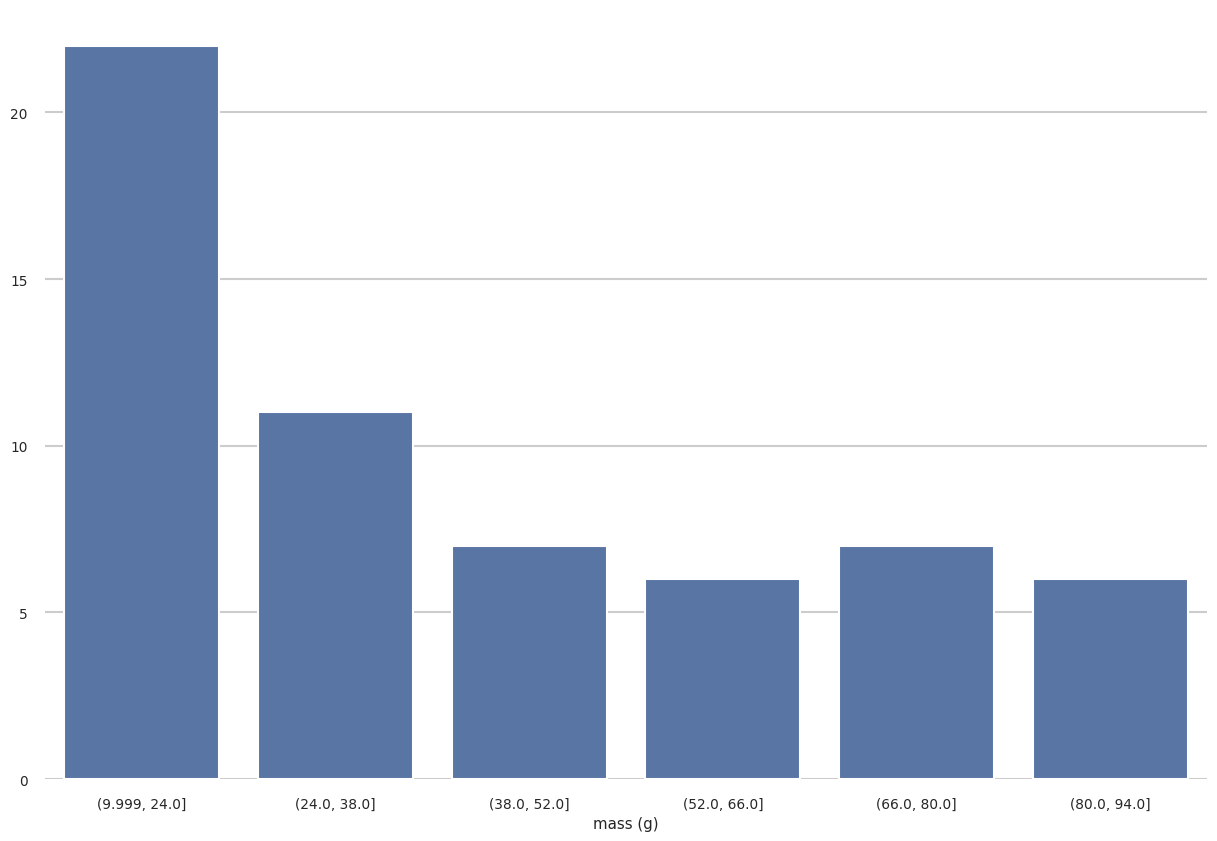

In [130]:
sb.barplot(x=new_data.value_counts().index, y=new_data.value_counts().values)
sb.set_theme(rc={'figure.figsize':(15, 10)})
sb.set_style('whitegrid')
sb.despine(left=True, bottom=True)
sb.set_context("talk", font_scale=0.6)
